In [ ]:
## 영화 리뷰 데이터 실습
# 리뷰와 리뷰에 해당하는 감정(긍정, 부정) 값을 가지고 있음.

In [1]:
import os
import re

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [2]:
data_set = tf.keras.utils.get_file(
    fname="imdb.tar.gz",
    origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract=True
)

84131840/84125825 [==============================] - 4s 0us/step


In [3]:
# 각 파일에서 리뷰 텍스트를 불러오기

def directory_data(directory):
  data = {}
  data["review"] = []
  for file_path in os.listdir(directory):
    with open(os.path.join(directory, file_path), "r") as file:
      data["review"].append(file.read())
  
  return pd.DataFrame.from_dict(data)

In [4]:
# 각 리뷰에 해당하는 라벨값을 가져오는 함수

def data(directory):
  pos_df = directory_data(os.path.join(directory, "pos"))
  neg_df = directory_data(os.path.join(directory, "neg"))
  pos_df["sentiment"] = 1
  neg_df["sentiment"] = 0

  return pd.concat([pos_df, neg_df])


# pos 폴더 : 긍정(1) / neg 폴더 : 부정(0)

In [5]:
# 두 함수 호출 후 판다스 데이터프레임을 반환한다.

train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [6]:
train_df.head()

,review,sentiment
0,This film is available from David Shepard and ...,1
1,Eddie Izzard is nothing short of a comedic gen...,1
2,Sometimes you have to look back to go forward....,1
3,Until today I had never seen this film. Its wa...,1
4,I enjoyed this film far more than anything had...,1


In [7]:
# 위 데이터프레임에서 review 문장 리스트를 가져온다.

reviews = list(train_df['review'])

In [8]:
# 문자열 문장 리스트를 토크나이징
tokenized_reviews = [r.split() for r in reviews]

# 토크나이징된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]

# 토크나이징된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]

# -> 문장에 포함된 단어와 알파벳의 개수에 대한 데이터 분석을 수월하게 할 수 있다!!!

In [9]:
len(tokenized_reviews)

25000

In [10]:
len(review_len_by_token)

25000

In [11]:
len(review_len_by_eumjeol)

25000

In [11]:
tokenized_reviews

Output hidden; open in https://colab.research.google.com to view.

In [12]:
review_len_by_token

[219,
 193,
 112,
 245,
 165,
 128,
 124,
 167,
 118,
 139,
 280,
 159,
 38,
 124,
 137,
 139,
 347,
 291,
 244,
 77,
 238,
 139,
 79,
 246,
 276,
 456,
 1296,
 415,
 136,
 561,
 128,
 135,
 125,
 105,
 158,
 383,
 138,
 133,
 163,
 115,
 284,
 351,
 127,
 230,
 197,
 260,
 168,
 216,
 95,
 282,
 72,
 71,
 119,
 510,
 222,
 327,
 138,
 59,
 61,
 297,
 127,
 412,
 147,
 253,
 82,
 132,
 80,
 162,
 238,
 178,
 164,
 63,
 161,
 143,
 120,
 518,
 442,
 180,
 733,
 144,
 120,
 191,
 178,
 448,
 159,
 545,
 179,
 170,
 342,
 97,
 216,
 153,
 56,
 60,
 217,
 286,
 235,
 129,
 121,
 602,
 131,
 242,
 234,
 365,
 142,
 544,
 264,
 102,
 84,
 108,
 274,
 117,
 136,
 131,
 385,
 154,
 103,
 261,
 518,
 141,
 142,
 215,
 200,
 335,
 150,
 475,
 147,
 187,
 1000,
 976,
 137,
 162,
 140,
 222,
 82,
 105,
 229,
 207,
 281,
 34,
 277,
 135,
 277,
 111,
 121,
 237,
 453,
 69,
 54,
 176,
 299,
 150,
 470,
 497,
 129,
 131,
 160,
 92,
 86,
 216,
 111,
 150,
 240,
 263,
 57,
 192,
 359,
 456,
 350,
 123,


In [13]:
review_len_by_eumjeol

[1118,
 912,
 559,
 1190,
 819,
 685,
 561,
 714,
 583,
 675,
 1494,
 729,
 178,
 551,
 673,
 569,
 1862,
 1306,
 1126,
 348,
 1069,
 666,
 322,
 1142,
 1300,
 2238,
 5839,
 1898,
 527,
 2533,
 536,
 607,
 576,
 492,
 745,
 1789,
 609,
 650,
 845,
 487,
 1367,
 1674,
 591,
 937,
 830,
 1264,
 794,
 972,
 405,
 1230,
 353,
 303,
 585,
 2393,
 905,
 1624,
 563,
 276,
 301,
 1364,
 647,
 1976,
 716,
 1164,
 376,
 631,
 431,
 703,
 1113,
 834,
 693,
 305,
 704,
 633,
 571,
 2549,
 1826,
 896,
 3480,
 702,
 510,
 971,
 908,
 2090,
 713,
 2631,
 856,
 758,
 1458,
 443,
 1077,
 756,
 259,
 223,
 881,
 1338,
 1065,
 574,
 590,
 2708,
 542,
 1078,
 1153,
 1689,
 603,
 2226,
 1241,
 589,
 360,
 512,
 1217,
 520,
 832,
 583,
 1819,
 715,
 535,
 1216,
 2337,
 643,
 626,
 929,
 943,
 1702,
 916,
 2135,
 652,
 881,
 4753,
 4965,
 567,
 787,
 584,
 951,
 446,
 528,
 1005,
 1109,
 1270,
 160,
 1302,
 568,
 1255,
 461,
 560,
 1110,
 2088,
 310,
 298,
 809,
 1294,
 650,
 2146,
 2291,
 559,
 572,
 776,
 

Text(0, 0.5, 'Number of Reviews')

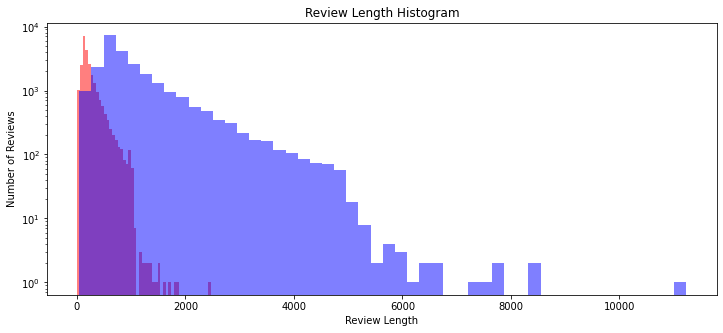

In [14]:
import matplotlib.pyplot as plt

# 그래프에 대한 이미지 크기 선언
# figsize : (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))

# 히스토그램 선언
# bins; 히스토그램 값에 대한 버킷 범위
# alpha : 그래프 색상 투명도
# color : 그래프 색상
# label : 그래프에 대한 라벨
plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')

# 그래프 제목
plt.title('Review Length Histogram')
# 그래프 x축 라벨
plt.xlabel('Review Length')
# 그래프 y축 라벨
plt.ylabel('Number of Reviews')

### 빨간색 히스토그램 : 단어 개수 / 파란색 히스토그램 : 알파벳 개수

In [18]:
## 데이터 분포를 통계치로 수치화

import numpy as np

print('문장 최대 길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소 길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균 길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간 길이: {}'.format(np.median(review_len_by_token)))

# 사분위의 대한 경우는 0~100 스케일로 돼 있음!
print('제 1사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대 길이: 2470
문장 최소 길이: 10
문장 평균 길이: 233.79
문장 길이 표준편차: 173.73
문장 중간 길이: 174.0
제 1사분위 길이: 127.0
제 3사분위 길이: 284.0


{'boxes': [<matplotlib.lines.Line2D at 0x7fa01817c350>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa017e5c750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa017e22590>],
 'means': [<matplotlib.lines.Line2D at 0x7fa017e22bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa018051150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa017e25e90>,
  <matplotlib.lines.Line2D at 0x7fa017e5c050>]}

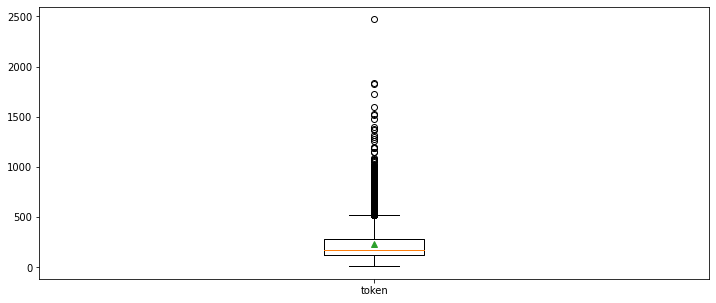

In [19]:
## 박스플롯 생성

plt.figure(figsize=(12, 5))
# 첫번째 인자 : 여러 분포에 대한 데이터 리스트를 입력
# labels : 입력한 데이터에 대한 라벨
# showmeans : 평균값을 마크함

plt.boxplot([review_len_by_token],
            labels=['token'],
            showmeans=True)

# 이상치 심함

{'boxes': [<matplotlib.lines.Line2D at 0x7fa017d99c50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa017da1550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa017e037d0>],
 'means': [<matplotlib.lines.Line2D at 0x7fa017d9abd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa017d9a490>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa017e13e90>,
  <matplotlib.lines.Line2D at 0x7fa017da1d50>]}

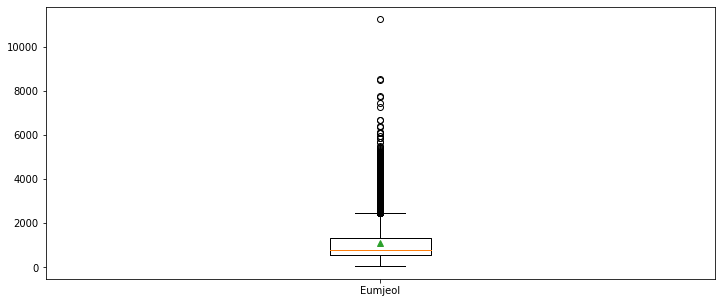

In [20]:
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_eumjeol],
            labels=['Eumjeol'],
            showmeans=True)

# 이상치 심함

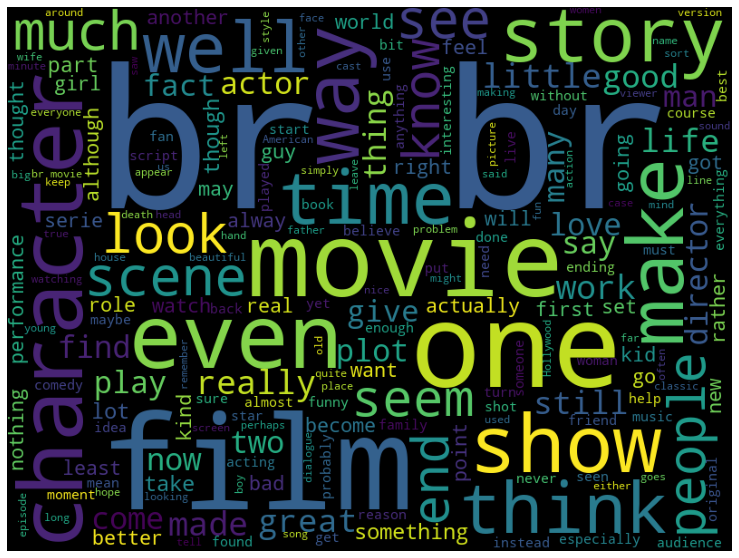

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords=STOPWORDS, background_color = 'black', width=800, 
height=600).generate(' '.join(train_df['review']))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### <br>과 같은 HTML 태그가 포함되어 있어 br의 단어 크기가 크게 나타남을 확인할 수 있다. 이와 관련해서는 학습에 도움이 되지
### 않기 때문에 제거해야하며, 전처리 부분에서 다시 다뤄야할 것으로 생각이 된다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


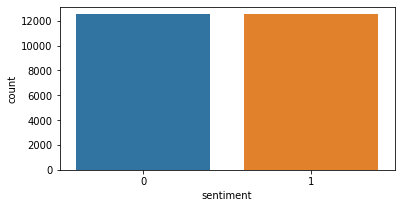

In [27]:
## 긍정.부정의 분포

import seaborn as sns 
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe=plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_df['sentiment'])


### -> 긍정과 부정의 개수가 모두 12000개로 동일하게 나타난다. 이것은 데이터의 균형이 아주 좋다는 것을 나타낸다.!